# The Basics of the SVM algorithm

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv("./data/2-classes.csv")

The Support Vector Machine algorithm is a classification algorithm thus it
tries to predict the **class** of a data samemple based on its features.

To start our understanding of SVM let's consider the simpler possible case 
which can be found in a set of two dimentional data (that can be expressed
as x, y for example) which hold exactly two classes and can be **linearly** 
separated.

An example of this type of data can be seen here:

<img src="./images/SVN-2d-data.png" style="width:320px"/>

Given this dataset it becomes trivial to realize and see how the two classes
can be separated by a straigh line as follows:

<img src="./images/SVM-2d-separated.png" style="width:320px"/>


The two classes of data points are separated linearly but we can also notice 
that there are infinite number of such lines and in the picture above we can 
only see one of these lines (the red thick line).

The question that arises here is wheather this line is the best way to separate
the **plane** to two hald planes in such a way that predicting the class of an
unseen data point will be the best.

## Any separating line might not be good enough

The red line that separates the plane in the picture above is not very good! 

We can intutively realize this by introducing a new unseen data point which is very
close to the "orange" points but still based on how the line is oriented it falls 
in the opposite classification:

<img src="./images/SVM-missed-outlier.png" style="width:620px"/>

This notification leads us to the main objective of the SVM algorithm:

> **The objective of the Support Vector Machine algorithm is to discover the best way to separate the plane to allow the most robust  predictions for unseen data**


## A "better" line to separate classes

Using exactly the same data as before we can visually see and understand that the 
following (red) line that separates the two classes is much better and robust; note
that the unseen "new" (orange) data point now is falling within the correct half-plane
making our classifier better:

<img src="./images/SVN-included-outlier.png" style="width:620px"/>


# Some useful definitions

# Hyperplane

A loose defintion that can serve us well when talking about SVMs is that a **Hyperplane** 
is the dataspace that has one less dimention from the dataspace we are working on.

**Example of a Hyperpane**

When we are working with 2 dimensional data the corresponing Hyperplane will 
be a straight line that divides the plane. An example of this can be seen in 
the red line that separated the plane in to the two classe in the above example.

If we are working of a 3 dimentional space then the hyperplane will be a 
2 dimentional plane as can be seen here:

<img src="./images/3d-hyperplane.jpeg" style="width:320px"/>


# Support Vectors

In SVM the term **support vector** refers to the sample that is closest the dividing hyperplane.


# Margin

In SVM the term **margin** refers to the distance between the **hyperplane** and the closest 
**support vector** (the larger the better).


In this picture we can visually see the above definitions:


<img src="./images/SVM-definitions.png" style="width:620px"/>




# More advanced cases for SVM

The example we have seen so far is the simpler possible; SVM can be very useful
and successful in way more complicated datasets that a plain 2D / 2 class / linear
sepearable set.

What we will see later are the following:

- Handling datasets with more than two features ($x_1, x_2, .. x_n$ as opposed to only $x_1, x_2$)

- Handling non-linear separable data sets





In [10]:
def plot_line(*, a, b, c, d, color='black',  linewidth=3.1, linestyle='solid'):
    assert b != 0 and a != 0
    point1 = [0,  (d-c) / b]
    point2 = [(d-c)/a, 0]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, color=color, linewidth=linewidth, linestyle=linestyle)
    plt.grid(color='gray', linestyle='-', linewidth=0.2)
    plt.xlabel("x")
    plt.ylabel("y")

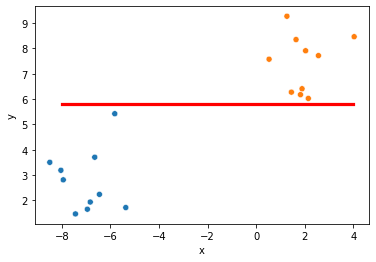

In [59]:
sns.scatterplot(x = df["x"], y = df["y"], hue=df["Label"])
plt.legend([],[], frameon=False)


p1, p2 = [-8, 5.8], [4, 5.8]
x_values = [p1[0], p2[0]]
y_values = [p1[1], p2[1]]
_ = plt.plot(x_values, y_values, color="red", linewidth=3.2, linestyle="solid")


A straight line in the 2 dimentional plane can be represented by the following equation: 

$\Large ax + by + c=0$

To make things more concrete lets assume:

$\Large a=3, b=2, c = -2$

so our line becomes 

$\Large 3x + 2y - 2= 0$


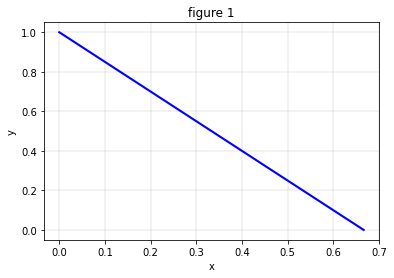

In [11]:
a, b, c = 3, 2, -2 
plot_line(a=a, b=b, c=c, d = 0, color="blue", linestyle='solid', linewidth=2.1 )
_ = plt.title("figure 1")

If we also plot the following lines:

$\Large 3x + 2y - 2 = -1$

$\Large 3x + 2y - 2 =  0$

our plot now becomes:


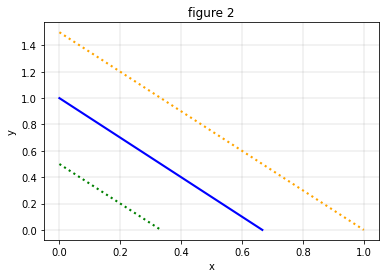

In [12]:
a, b, c = 3, 2, -2 
plot_line(a=a, b=b, c=c, d = 0, color="blue", linestyle='solid', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = -1, color="green", linestyle='dotted', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = 1, color="orange", linestyle='dotted', linewidth=2.1 )
_ = plt.title("figure 2")

To summarize, the 3 lines that we are plotting above are the following:

$\Large 3x + 2y - 2= -1$

$\Large 3x + 2y - 2= 0$

$\Large 3x + 2y - 2= 1$

What will happen if I multiply OLNY the left part of these equations by the same number? 

For our example lets say that we multiply the left parts of the equations by the number 3 thus our equations now become:

$\Large 9x + 4y - 4= -1$

$\Large 9x + 4y - 4= 0$

$\Large 9x + 4y - 4= 1$

An if we plot them again the graphical represenation appears 
as follows:


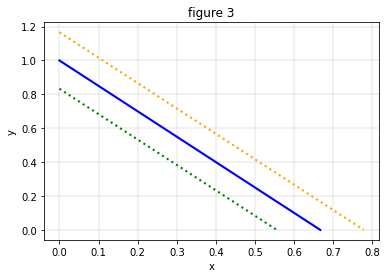

In [13]:
a, b, c = 3*3, 3*2, 3*-2 
plot_line(a=a, b=b, c=c, d = 0, color="blue", linestyle='solid', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = -1, color="green", linestyle='dotted', linewidth=2.1 )
plot_line(a=a, b=b, c=c, d = 1, color="orange", linestyle='dotted', linewidth=2.1 )
_ = plt.title("figure 3")

Carefully insepecting the figure 3 we notice that although
the "blue" line (the one that is set to equals to 0) remains
in the same postion, the other two lines have now moved closer to it (while they are still parallel to it though).

It is easy to realize that as the factor we used to multiply the 
left side of the equations grow the closer the three lines are 
getting to each other ( and vice versa).


### Definition: Expanding rate

We define the "factor" we have used to multiply the left sides
of the above equations to be called as the **Expanding rate**